# 한국은행 의사록 어조 분석

이제 극성사전이 완성되었으므로, 이를 이용해 한국은행 의사록의 어조(tone)을 측정하도록 한다. 

우선 각 일자의 한국은행 의사록을 `sentences`로 분리한 뒤, 각 `sentences`를 다시 `ngrams`로 분리한다. 

문장별로 추출한 `ngrams`를 바탕으로 각 문장의 `tone_sentence`를 계산한다. 

문장별 `tone_sentence`가 계산됐으면, 문장을 다시 합쳐 문서(의사록)의 `tone_doc`을 구한다. 

한 날짜에는 한 문서가 있고, 따라서 한 `tone_doc`이 있으므로, 이제 이 데이터를 바탕으로 한국은행 기준금리 데이터와의 상관관계와 그래프를 확인한다. 

In [47]:
# -*- coding: utf-8 -*-

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import multiprocessing as mp

import preprocessing_mp_worker as worker

## 의사록 데이터를 불러온다. 

<font style='color:red;'>TODO: 의사로 전체의 내용에서 문장을 분리하는 것은 잘못됐다. 섹션 2,3에 대해서만 문장을 분리하여 tone을 분석하는 것이 논리적으로 맞다. 수정해야 함.  </font>

In [48]:
minutes_df = pd.read_pickle('./data_files/BOK_minutes/pkl/minutes_ngram.pkl')
minutes_df = minutes_df[['date', 'minutes']]
minutes_df.head()

,date,minutes
0,2005-06-09,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...
1,2005-06-23,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...
2,2005-07-07,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...
3,2005-08-11,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...
4,2005-09-08,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...


## 각 의사록(`minutes`)을 문장(`sentences`)들로 분리한다. 

In [49]:
%%time

minutes_df.loc[:, 'sentences'] = minutes_df.minutes.map(lambda x: worker.tidy_sentences(x)[0])

Wall time: 816 ms


In [50]:
minutes_df = minutes_df.explode('sentences')
minutes_df.head()

,date,minutes,sentences
0,2005-06-09,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,130.1...
0,2005-06-09,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,5. 참 여 자 이 상 용 감사 정 규 영 ...
0,2005-06-09,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,"(３) 위원 토의내용 ｢국내외 경제동향｣과 관련하여, 일부 위원은 최근 소비..."
0,2005-06-09,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,동 위원은 서울 강남에서 시작된 부동산가격 상승이 다른 지역으로 확산될 기미가 ...
0,2005-06-09,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,또한 동 위원은 정부가 여러 차례에 걸쳐 부동산시장 안정대책을 내놓았음.


In [51]:
minutes_df.dropna(inplace=True) # sentences가 np.nan이라서 float으로 들어가 오류나는 경우 존재한다. 
minutes_df.date = pd.to_datetime(minutes_df.date)
minutes_df.reset_index(drop=True, inplace=True)

In [52]:
len(minutes_df)

42661

In [53]:
minutes_df.describe()

,date,minutes,sentences
count,42661,42661,42661
unique,297,297,41345
top,2018-10-18 00:00:00,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,다.
freq,451,451,231
first,2005-06-09 00:00:00,NaN,NaN
last,2020-01-17 00:00:00,NaN,NaN


In [54]:
minutes_df.head()

,date,minutes,sentences
0,2005-06-09,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,130.1...
1,2005-06-09,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,5. 참 여 자 이 상 용 감사 정 규 영 ...
2,2005-06-09,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,"(３) 위원 토의내용 ｢국내외 경제동향｣과 관련하여, 일부 위원은 최근 소비..."
3,2005-06-09,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,동 위원은 서울 강남에서 시작된 부동산가격 상승이 다른 지역으로 확산될 기미가 ...
4,2005-06-09,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,또한 동 위원은 정부가 여러 차례에 걸쳐 부동산시장 안정대책을 내놓았음.


## 각 문장을 `ngrams`로 분리한다. 

In [55]:
%%time 
# Wall time: 42min 39s

with mp.Pool(processes=6) as p:
    minutes_sentences_ngrams = p.map(worker.text2ngram, minutes_df.sentences)

Wall time: 42min 42s


In [56]:
len(minutes_sentences_ngrams)

42661

## Polarity Dictionary를 불러온다. 

그리고 hawkish_dictionary와 dovish_dictionary로 나눈다. 

In [57]:
polarity_dictionary = pd.read_pickle('./data_files/results/polarity_dictionary_1.3threshold.pkl')
polarity_dictionary.head()

,hawkish,dovish,total,prob_feature_given_hawkish,prob_feature_given_dovish,polarity_score
이변/NNG,9,7,16,0.000008,0.000005,1.556266
지신/NNG,12,8,20,0.000010,0.000006,1.815644
그렉시트/NNG,17,34,51,0.000014,0.000024,0.605215
실험/NNG,19,9,28,0.000016,0.000006,2.555350
자산배분전략/NNG,10,102,112,0.000008,0.000071,0.118670


In [58]:
intensity_threshold = 1.3

hawkish_dictionary = polarity_dictionary[polarity_dictionary.polarity_score >= intensity_threshold]
hawkish_dictionary = hawkish_dictionary.index

dovish_dictionary = polarity_dictionary[polarity_dictionary.polarity_score <= 1/intensity_threshold]
dovish_dictionary = dovish_dictionary.index

In [59]:
print("hawkish dictionary 크기: ", len(hawkish_dictionary))
print("dovish dictionary 크기: ", len(dovish_dictionary))

hawkish dictionary 크기:  1743
dovish dictionary 크기:  1990


In [82]:
dovish_dictionary

AttributeError: 'Index' object has no attribute 'head'

뉴스 ngram 추출을 하지 않아 사전크기가 너무 작으므로, 김현진T에게 받은 뉴스데이터의 ngram까지 추가된 hawkish/dovish dictionary를 받아 결과를 확인해보겠다. 

In [60]:
alter_hawkish_dictionary = pd.read_csv('./data_files/results/close_hawkish_dic.csv')
alter_hawkish_dictionary = alter_hawkish_dictionary.iloc[:,0]

In [61]:
alter_dovish_dictionary = pd.read_csv('./data_files/results/close_dovish_dic.csv')
alter_dovish_dictionary = alter_dovish_dictionary.iloc[:,0]

In [74]:
print("altered hawkish dictionary 크기: ", len(alter_hawkish_dictionary))
print("altered dovish dictionary 크기: ", len(alter_dovish_dictionary))

altered hawkish dictionary 크기:  11863
altered dovish dictionary 크기:  13171


In [81]:
alter_dovish_dictionary.head()

0      인하/NNG
1    양적완화/NNG
2      대책/NNG
3    금융위기/NNG
4      부양/NNG
Name: Unnamed: 0, dtype: object

## 각 문장의 tone을 구한다. 

** 내 dictionary와 김현진T의 dictionary는 모양이 다르다. 
- 내 dictioanry 돌릴 시, `if ngram in hawkish_dictionary:`, 
- 김현진T dictionary 돌릴 시, `if ngram in alter_hawkish_dictionary.iloc[0]:`

In [86]:
def sentence_tone(sentence_ngram_list):
    hawkish_count = 0
    dovish_count = 0
    
    for ngram in sentence_ngram_list:
        if ngram in alter_hawkish_dictionary.iloc[0]:
            hawkish_count += 1
        elif ngram in alter_dovish_dictionary.iloc[0]:
            dovish_count += 1
        else:
            continue
    
    if (hawkish_count + dovish_count) == 0:
        return np.nan
    
    sentence_tone = (hawkish_count - dovish_count) / (hawkish_count + dovish_count)
    
    return sentence_tone

In [87]:
sentence_tone_list = [sentence_tone(ngram_list) for ngram_list in minutes_sentences_ngrams]
len(sentence_tone_list)

42661

In [88]:
sentence_tone_df = pd.DataFrame(sentence_tone_list, columns=['sentence_tone'])
minutes_df_tone = pd.concat([minutes_df, sentence_tone_df], axis=1)

In [89]:
minutes_df_tone.to_pickle('./data_files/results/alter_minutes_df_sentence_tone.pkl')

## 문서의 tone을 구한다. 

`.groupby('date')`를 했다. 한 날짜에 의사록이 하나 올라온다 가정. 

In [90]:
minutes_df_tone_by_date = minutes_df_tone.groupby('date')['sentence_tone'].sum()
minutes_df_tone_by_date = pd.DataFrame({'doc_tone': minutes_df_tone_by_date.values}, index=minutes_df_tone_by_date.index)
minutes_df_tone_by_date.head()

,doc_tone
date,
2005-06-09,-4.000000
2005-06-23,0.000000
2005-07-07,14.333333
2005-08-11,21.000000
2005-09-08,19.000000


In [91]:
minutes_df_tone_by_date.to_pickle('./data_files/results/alter_minutes_df_document_tone.pkl')

## 한국은행 기준금리 데이터를 불러와 합친다. 

In [92]:
minutes_df_tone_by_date = pd.read_pickle('./data_files/results/alter_minutes_df_document_tone.pkl')
minutes_df_tone_by_date.head()

,doc_tone
date,
2005-06-09,-4.000000
2005-06-23,0.000000
2005-07-07,14.333333
2005-08-11,21.000000
2005-09-08,19.000000


In [93]:
bok_policy_rate = pd.read_csv('./data_files/BOK_2.6._base_rate.csv')
bok_policy_rate.date = pd.to_datetime(bok_policy_rate.date)
bok_policy_rate.set_index('date', inplace=True)
bok_policy_rate.head()

,base_rate
date,
2004-01-01,3.75
2004-01-02,3.75
2004-01-03,3.75
2004-01-04,3.75
2004-01-05,3.75


In [94]:
tone_and_policy_rate_df = minutes_df_tone_by_date.merge(bok_policy_rate, how='left', left_index=True, right_index=True)
tone_and_policy_rate_df.head()

,doc_tone,base_rate
date,,
2005-06-09,-4.000000,3.25
2005-06-23,0.000000,3.25
2005-07-07,14.333333,3.25
2005-08-11,21.000000,3.25
2005-09-08,19.000000,3.25


In [95]:
tone_and_policy_rate_df.to_pickle('./data_files/results/alter_tone_and_policy_rate_df.pkl')

## 상관관계 계산 및 그래프 plot

In [96]:
tone_and_policy_rate_df.corr(method='pearson')

,doc_tone,base_rate
doc_tone,1.000000,0.034379
base_rate,0.034379,1.000000


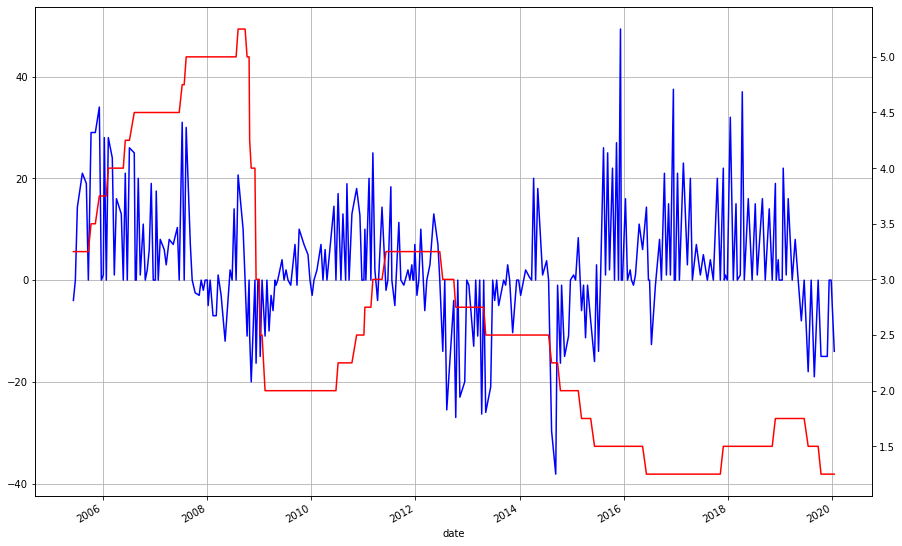

In [97]:
plt.figure(figsize=(15,10))

ax1 = tone_and_policy_rate_df.doc_tone.plot(color='blue', grid=True, label='금통위 의사록 어조')
ax2 = tone_and_policy_rate_df.base_rate.plot(color='red', grid=True, secondary_y=True, label='기준금리')

plt.show()